# Points and lines in 2D

This notebook shows a simple way to perform operations with points and lines in 2D.

## Homogenenous coordinates for 2D points

We will use a convention known as "2D homogeneous coordinates" in which each point is represented by three numbers.

To represent a cartesian point in homogeneous coordinates, you just add a 1 as the third coordinate: 

- $(x,y)$ in cartesian coordinates becomes $(x,y,1)$ in homogeneous coordinates.

To represent an homogeneous point in cartesian coordinates, you divide by its third coordinate:
- $(x,y,w)$ in homogeneous coordinates becomes $(x/w, y/w)$ in cartesian coordinates.

In [14]:
from audioop import cross

import numpy as np
import matplotlib.pyplot as plt

# Define four points in 2D homogeneous coordinates.
# First two coordinates are cartesian 2D, third coordinate is 1.

a = np.array([2,1,1])
b = np.array([5,3,1])
c = np.array([1,4,1])
d = np.array([3,4,1])

/var/folders/ft/p6xwtlq12ygfhmnytl1ngxdm0000gn/T/ipykernel_3766/2441155693.py:1: DeprecationWarning: 'audioop' is deprecated and slated for removal in Python 3.13
  from audioop import cross


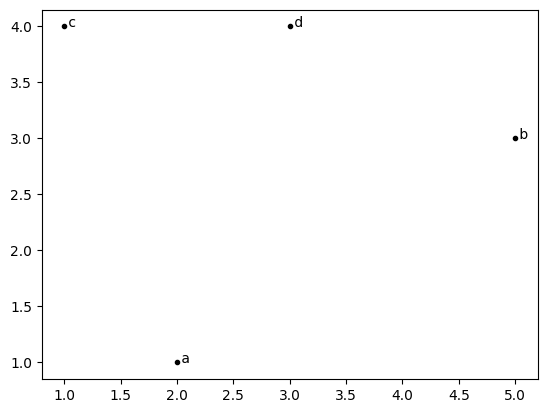

In [15]:
def plotpoint(x, y, name, ax):
    """ plots a point and gives it a name"""
    ax.plot(x, y, "k.")
    ax.text(x, y, " "+name)

fig,ax = plt.subplots()
plotpoint(x=a[0]/a[2], y=a[1]/a[2], name="a", ax=ax)
plotpoint(x=b[0]/b[2], y=b[1]/b[2], name="b", ax=ax)
plotpoint(x=c[0]/c[2], y=c[1]/c[2], name="c", ax=ax)
plotpoint(x=d[0]/d[2], y=d[1]/d[2], name="d", ax=ax)

## Finding a line through two points

The advantage of using this convention -- which might seem strange and useless -- is that typical operations are very easy to perform, using the standard [cross product](https://en.wikipedia.org/wiki/Cross_product) operation (`np.cross` in numpy)

In [16]:
# Line through a and b
lab = np.cross(a,b)

# Line through c and d
lcd = np.cross(c,d)

print(lab, "represents the line through a and b")
print(lcd, "represents the line through c and d")

[-2  3  1] represents the line through a and b
[ 0  2 -8] represents the line through c and d


Just like a point is represented by a vector with three elements, also a line is represented in the same way!

## Finding the intersection of two lines

If you have two lines in homogeneous coordinates, you find the point at their intersection by doing the cross product between them.

This results in a vector of three elements that represents a point in homogeneous coordinates.

In [17]:
# Intersection between the two lines
e = np.cross(lab, lcd)

print("Homogeneous coordinates for point e: ",e)
print("Cartesian coordinates for point e: ", e[0]/e[2], e[1]/e[2])

Homogeneous coordinates for point e:  [-26 -16  -4]
Cartesian coordinates for point e:  6.5 4.0


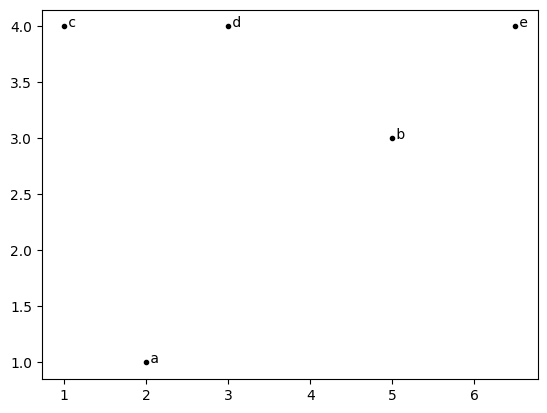

In [18]:
plotpoint(x=e[0]/e[2], y=e[1]/e[2], name="e", ax=ax)
fig

### Easy exercise
find and draw the intersection of the diagonals of the quadrilateral a,b,c,d

In [24]:
# Line through a and d
lad = np.cross(a,d)

# Line through b and c
lbc = np.cross(b,c)

In [25]:
f = np.cross(lad,lbc)

print("Homogeneous coordinates for point f: ",f)
print("Cartesian coordinates for point f: ", f[0]/f[2], f[1]/f[2])

Homogeneous coordinates for point f:  [37 46 13]
Cartesian coordinates for point f:  2.8461538461538463 3.5384615384615383


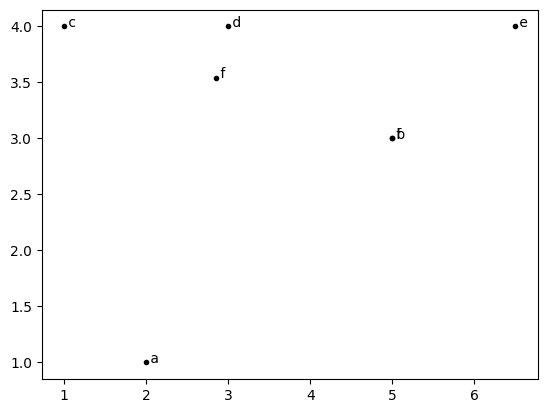

In [26]:
plotpoint(x=f[0]/f[2], y=f[1]/f[2], name="f", ax=ax)
fig